In [1]:
import pandas as pd
import joblib

In [2]:
df = pd.read_csv(r"P:\SSM project\Datasets\Server_logs\CIDDS-001-external-week1.csv")
df.columns = df.columns.str.strip()
df = df.drop(columns=['attackType'])
df = df.drop(columns=['attackID'])
df = df.drop(columns=['attackDescription'])
print(df.head())


           Date first seen   Duration  Proto    Src IP Addr  Src Pt  \
0  2017-03-14 17:43:57.172  81412.697  TCP       EXT_SERVER    8082   
1  2017-03-14 17:43:57.172  81412.697  TCP    OPENSTACK_NET   56978   
2  2017-03-14 17:43:26.135  81504.787  TCP       EXT_SERVER    8082   
3  2017-03-14 17:43:26.135  81504.787  TCP    OPENSTACK_NET   56979   
4  2017-03-14 18:17:09.005  82100.692  TCP       EXT_SERVER    8082   

     Dst IP Addr   Dst Pt  Packets     Bytes  Flows   Flags  Tos   class  
0  OPENSTACK_NET  56978.0     3057     2.1 M      1  .AP...    0  normal  
1     EXT_SERVER   8082.0     4748     2.5 M      1  .AP...    0  normal  
2  OPENSTACK_NET  56979.0     8639     9.1 M      1  .AP...    0  normal  
3     EXT_SERVER   8082.0    12024    10.3 M      1  .AP...    0  normal  
4  OPENSTACK_NET  51649.0    11012    27.2 M      1  .AP.S.    0  normal  


In [3]:
def convert_bytes(x):
    x = str(x).strip()
    if 'M' in x:
        return float(x.replace('M', '').strip()) * 1_000_000
    elif 'K' in x:
        return float(x.replace('K', '').strip()) * 1_000
    else:
        return float(x)
    
df['Bytes'] = [convert_bytes(i) for i in df['Bytes']]


In [4]:
df['Date first seen']=pd.to_datetime(df['Date first seen'])
df['year'] = df['Date first seen'].dt.year
df['month'] = df['Date first seen'].dt.month
df['day'] = df['Date first seen'].dt.day
df['hour'] = df['Date first seen'].dt.hour
df['minute'] = df['Date first seen'].dt.minute
df['second'] = df['Date first seen'].dt.second
df=df.drop(columns=['Date first seen'])
print(df.head()) 

    Duration  Proto    Src IP Addr  Src Pt    Dst IP Addr   Dst Pt  Packets  \
0  81412.697  TCP       EXT_SERVER    8082  OPENSTACK_NET  56978.0     3057   
1  81412.697  TCP    OPENSTACK_NET   56978     EXT_SERVER   8082.0     4748   
2  81504.787  TCP       EXT_SERVER    8082  OPENSTACK_NET  56979.0     8639   
3  81504.787  TCP    OPENSTACK_NET   56979     EXT_SERVER   8082.0    12024   
4  82100.692  TCP       EXT_SERVER    8082  OPENSTACK_NET  51649.0    11012   

        Bytes  Flows   Flags  Tos   class  year  month  day  hour  minute  \
0   2100000.0      1  .AP...    0  normal  2017      3   14    17      43   
1   2500000.0      1  .AP...    0  normal  2017      3   14    17      43   
2   9100000.0      1  .AP...    0  normal  2017      3   14    17      43   
3  10300000.0      1  .AP...    0  normal  2017      3   14    17      43   
4  27200000.0      1  .AP.S.    0  normal  2017      3   14    18      17   

   second  
0      57  
1      57  
2      26  
3      26  
4 

In [5]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['Proto', 'Flags', 'Src IP Addr', 'Dst IP Addr', 'class']
encoders = {}
le = LabelEncoder()
for col in cols_to_encode:

    df[col] = le.fit_transform(df[col])
    encoders[col] = le 
print(df.head()) 

    Duration  Proto  Src IP Addr  Src Pt  Dst IP Addr   Dst Pt  Packets  \
0  81412.697      2        10537    8082        10477  56978.0     3057   
1  81412.697      2        10538   56978        10476   8082.0     4748   
2  81504.787      2        10537    8082        10477  56979.0     8639   
3  81504.787      2        10538   56979        10476   8082.0    12024   
4  82100.692      2        10537    8082        10477  51649.0    11012   

        Bytes  Flows  Flags  Tos  class  year  month  day  hour  minute  \
0   2100000.0      1     20    0      0  2017      3   14    17      43   
1   2500000.0      1     20    0      0  2017      3   14    17      43   
2   9100000.0      1     20    0      0  2017      3   14    17      43   
3  10300000.0      1     20    0      0  2017      3   14    17      43   
4  27200000.0      1     21    0      0  2017      3   14    18      17   

   second  
0      57  
1      57  
2      26  
3      26  
4       9  


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['Duration', 'Src Pt', 'Dst Pt', 'Packets', 'Bytes', 'Flows']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [7]:
joblib.dump(scaler, "server_scaler.pkl")

['server_scaler.pkl']

In [8]:
print(df.head())

   Duration  Proto  Src IP Addr    Src Pt  Dst IP Addr    Dst Pt   Packets  \
0  0.156680      2        10537  0.123323        10477  0.869429  0.089527   
1  0.156680      2        10538  0.869429        10476  0.123323  0.139065   
2  0.156857      2        10537  0.123323        10477  0.869444  0.253054   
3  0.156857      2        10538  0.869444        10476  0.123323  0.352219   
4  0.158004      2        10537  0.123323        10477  0.788113  0.322572   

      Bytes  Flows  Flags  Tos  class  year  month  day  hour  minute  second  
0  0.032407    0.0     20    0      0  2017      3   14    17      43      57  
1  0.038580    0.0     20    0      0  2017      3   14    17      43      57  
2  0.140432    0.0     20    0      0  2017      3   14    17      43      26  
3  0.158950    0.0     20    0      0  2017      3   14    17      43      26  
4  0.419753    0.0     21    0      0  2017      3   14    18      17       9  


In [9]:
# Separate features and labels
X = df.drop(columns=['class'])
y = df['class']

In [10]:
import networkx as nx

G = nx.DiGraph()

for _, row in df.iterrows():
    src = row['Src IP Addr']
    dst = row['Dst IP Addr']
    
    edge_data = {
        'proto': row['Proto'],
        'bytes': row['Bytes'],
        'packets': row['Packets'],
        'flags': row['Flags'],
        'duration': row['Duration'],
    }
    
    G.add_edge(src, dst, **edge_data)


In [11]:
df['Dst IP Addr'].value_counts().head(5)


Dst IP Addr
10476    86583
10477    24803
8         7404
11        4557
6624      3170
Name: count, dtype: int64

In [12]:
high_out_nodes = [n for n in G.nodes if G.out_degree(n) > 50]

for node in high_out_nodes:
    print(f"{node} → {G.out_degree(node)} outbound connections")

10537.0 → 10477 outbound connections


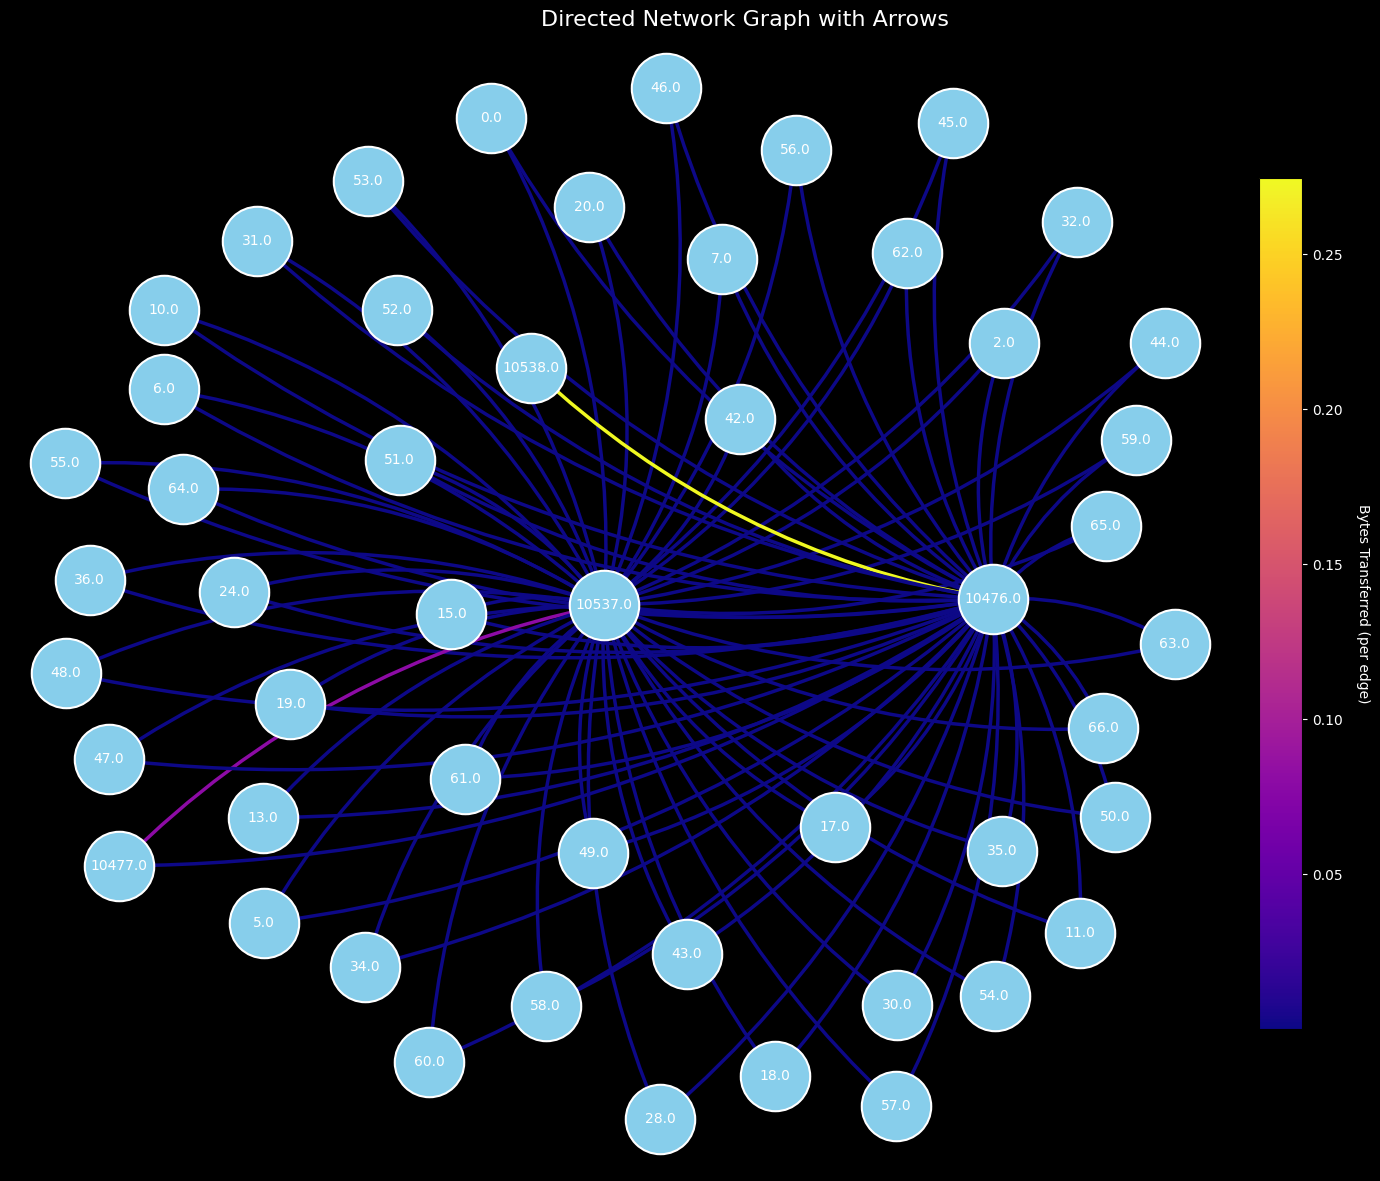

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
import networkx as nx
import numpy as np

top_nodes = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:50]
top_node_ids = [n for n, _ in top_nodes]
H = G.subgraph(top_node_ids)

pos = nx.spring_layout(H, k=0.5, seed=42)

edge_weights = [H[u][v].get('bytes', 1) for u, v in H.edges()]
norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
edge_colors = [plt.cm.plasma(norm(w)) for w in edge_weights]

fig, ax = plt.subplots(figsize=(15, 12), facecolor='black')
fig.suptitle("Directed Network Graph with Arrows", fontsize=16, color='white')

nx.draw_networkx_nodes(H, pos, node_color="skyblue", edgecolors='white', linewidths=1.5, node_size=2500, ax=ax)
nx.draw_networkx_labels(H, pos, font_color='white', font_size=10, ax=ax)

for (u, v), color in zip(H.edges(), edge_colors):
    rad = 0.15  
    arrow = mpatches.FancyArrowPatch(
        posA=pos[u],
        posB=pos[v],
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle='-|>',
        color=color,
        mutation_scale=18,
        lw=2.5
    )
    ax.add_patch(arrow)

sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.75, pad=0.02)
cbar.set_label('Bytes Transferred (per edge)', rotation=270, labelpad=20, color='white')
cbar.ax.yaxis.set_tick_params(color='white')
plt.setp(cbar.ax.yaxis.get_ticklabels(), color='white')

ax.set_facecolor('black')
ax.axis('off')
plt.tight_layout()
plt.show()


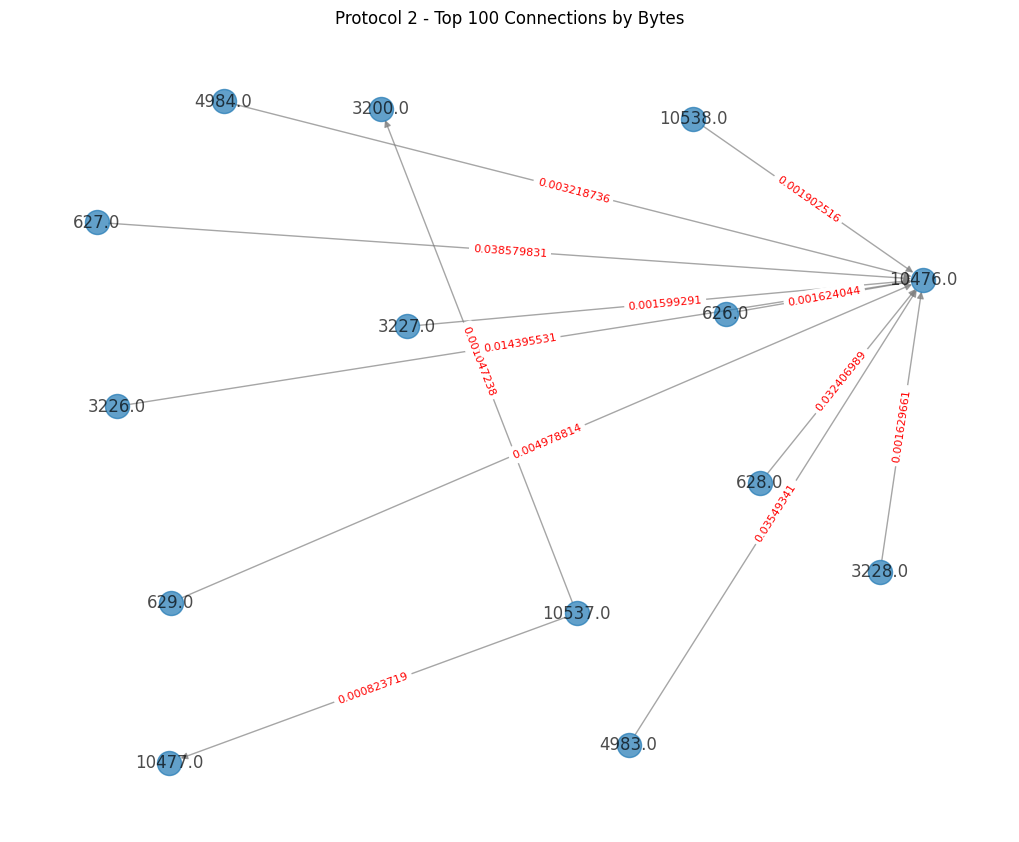

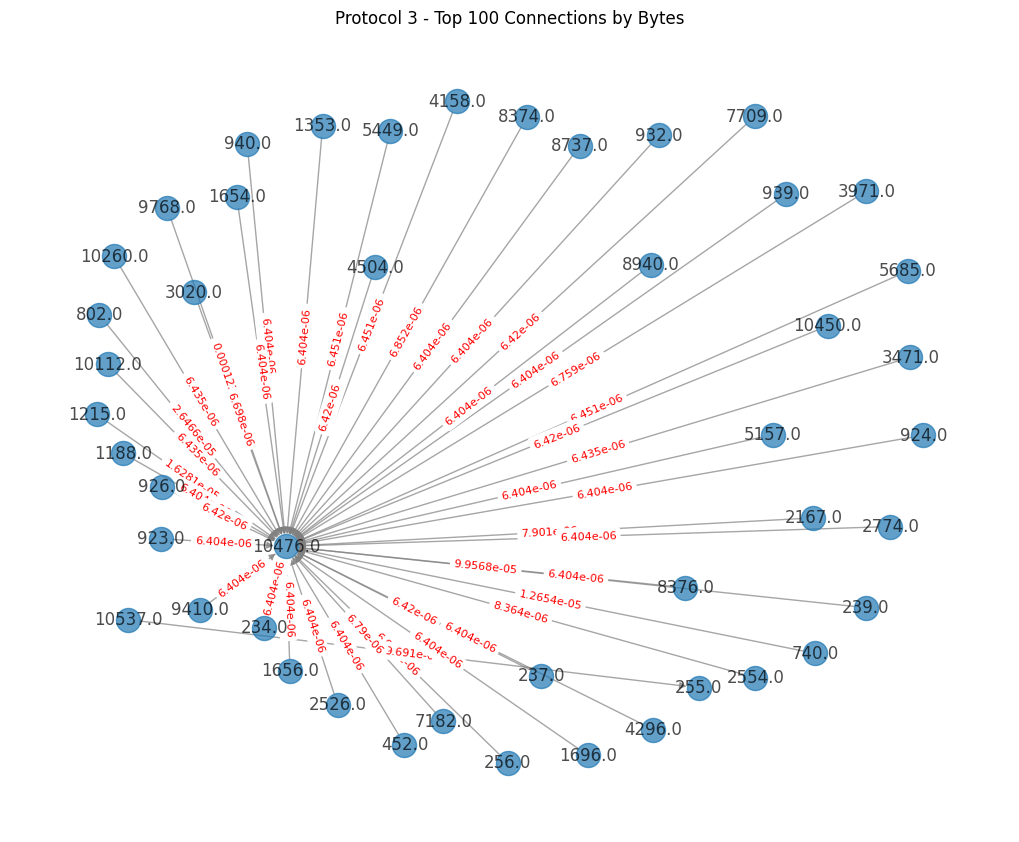

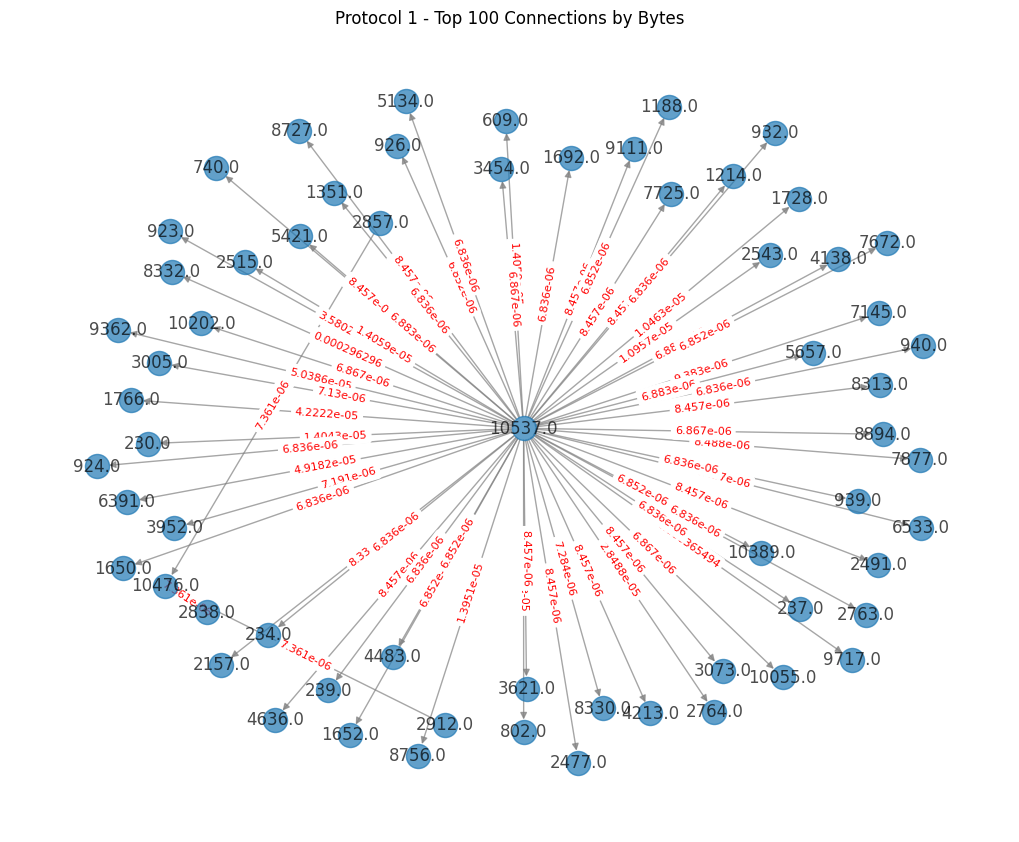

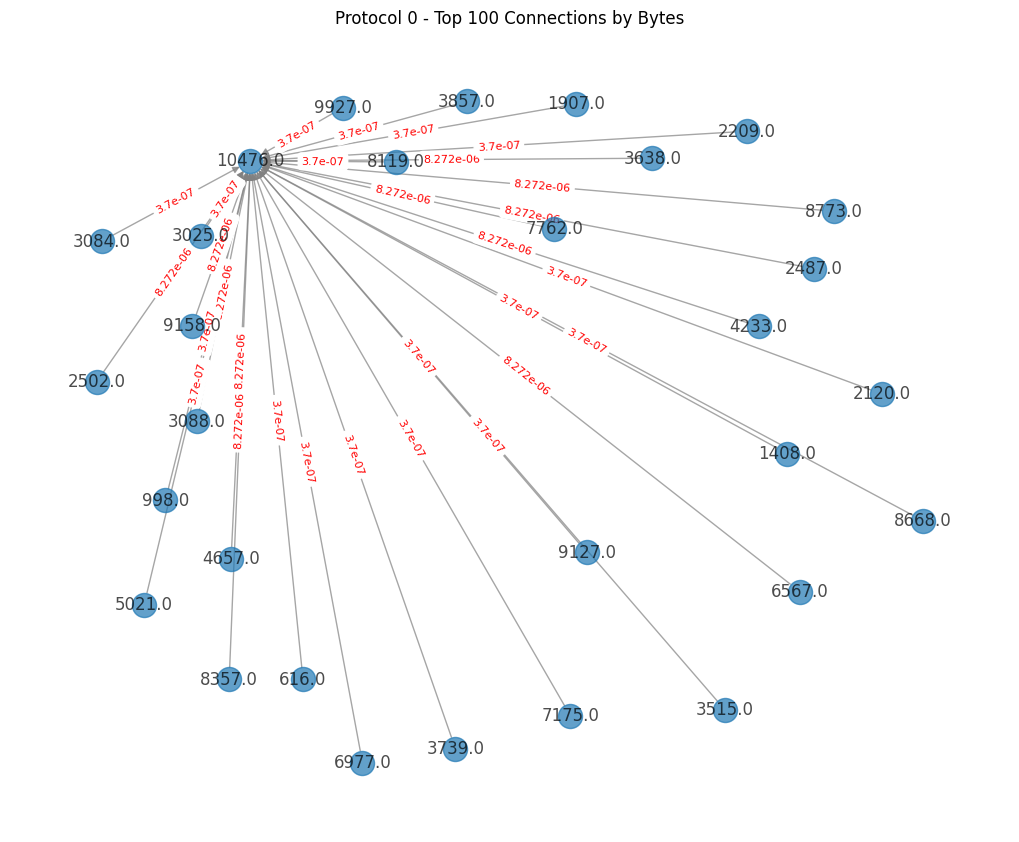

In [14]:
N = 100  
protocols = df['Proto'].unique()

for proto in protocols:
    df_proto = df[df['Proto'] == proto].copy()
    df_proto = df_proto.sort_values(by='Bytes', ascending=False).head(N)
    
    G_proto = nx.DiGraph()
    for _, row in df_proto.iterrows():
        src = row['Src IP Addr']
        dst = row['Dst IP Addr']
        edge_data = {
            'bytes': row['Bytes'],
            'packets': row['Packets'],
            'duration': row['Duration']
        }
        G_proto.add_edge(src, dst, **edge_data)

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G_proto, k=0.8, iterations=20)
    nx.draw(G_proto, pos, with_labels=True, node_size=300, edge_color='gray', alpha=0.7)
    edge_labels = {
        (u, v): round(d['bytes'], 9)
        for u, v, d in G_proto.edges(data=True)
    }
    nx.draw_networkx_edge_labels(G_proto, pos, edge_labels=edge_labels, font_size=8, font_color='red')
    plt.title(f"Protocol {proto} - Top {N} Connections by Bytes")
    plt.show()


In [15]:
df.head()

,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,year,month,day,hour,minute,second
0,0.156680,2,10537,0.123323,10477,0.869429,0.089527,0.032407,0.0,20,0,0,2017,3,14,17,43,57
1,0.156680,2,10538,0.869429,10476,0.123323,0.139065,0.038580,0.0,20,0,0,2017,3,14,17,43,57
2,0.156857,2,10537,0.123323,10477,0.869444,0.253054,0.140432,0.0,20,0,0,2017,3,14,17,43,26
3,0.156857,2,10538,0.869444,10476,0.123323,0.352219,0.158950,0.0,20,0,0,2017,3,14,17,43,26
4,0.158004,2,10537,0.123323,10477,0.788113,0.322572,0.419753,0.0,21,0,0,2017,3,14,18,17,9


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9921
           1       1.00      1.00      1.00     21469
           2       1.00      1.00      1.00      3178

    accuracy                           1.00     34568
   macro avg       1.00      1.00      1.00     34568
weighted avg       1.00      1.00      1.00     34568



In [17]:
joblib.dump(clf, 'server_logs.pkl')

['server_logs.pkl']